In [1]:
import numpy as np
import xarray as xr
import json
import os
import socket

import matplotlib.pyplot as plt

import xmitgcm as xm

from utils_mitgcm import open_mitgcm_ds_from_config

In [2]:
model = 'geneva_200m'

In [3]:
outputpath = "../99-Outputs/nencioli/"

# Open MITgcm results

In [4]:
mitgcm_config, ds_mitgcm = open_mitgcm_ds_from_config('../config.json', model)

In [5]:
temp_ini = ds_mitgcm.THETA.isel(time=0,Z=0)
mask = temp_ini.where(abs(temp_ini) > 1e-10).values

# Plot streamlines

In [6]:
t_index = 0
z_index  =0

snapshot_vel = ds_mitgcm.isel(time=t_index, Z=z_index)

x_plot, y_plot = np.meshgrid(snapshot_vel['XC'], snapshot_vel['YC'])
u_plot = snapshot_vel['UVEL'].values
v_plot = snapshot_vel['VVEL'].values

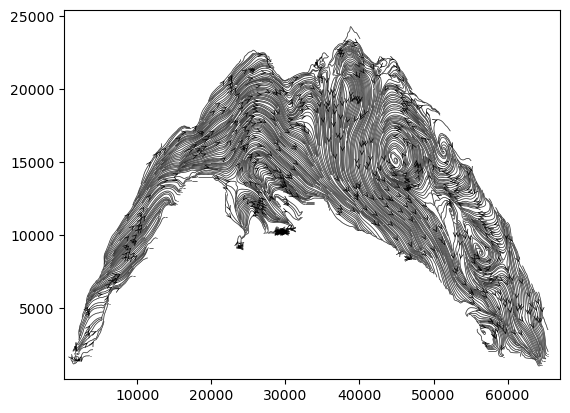

In [9]:
stream_density = 20

fig, ax = plt.subplots()
stream = ax.streamplot(x_plot, y_plot, u_plot, v_plot, 
                       density=stream_density, color='black', 
                       linewidth=0.5, arrowsize=0.7, arrowstyle='->')

# Save streamlines

In [11]:
lines = stream.lines.get_paths()
streamline_coords = [path.vertices for path in lines]
np.save(f'../99-Outputs/Streamlines/{model}/{t_index}.npy', streamline_coords)

# Display later on

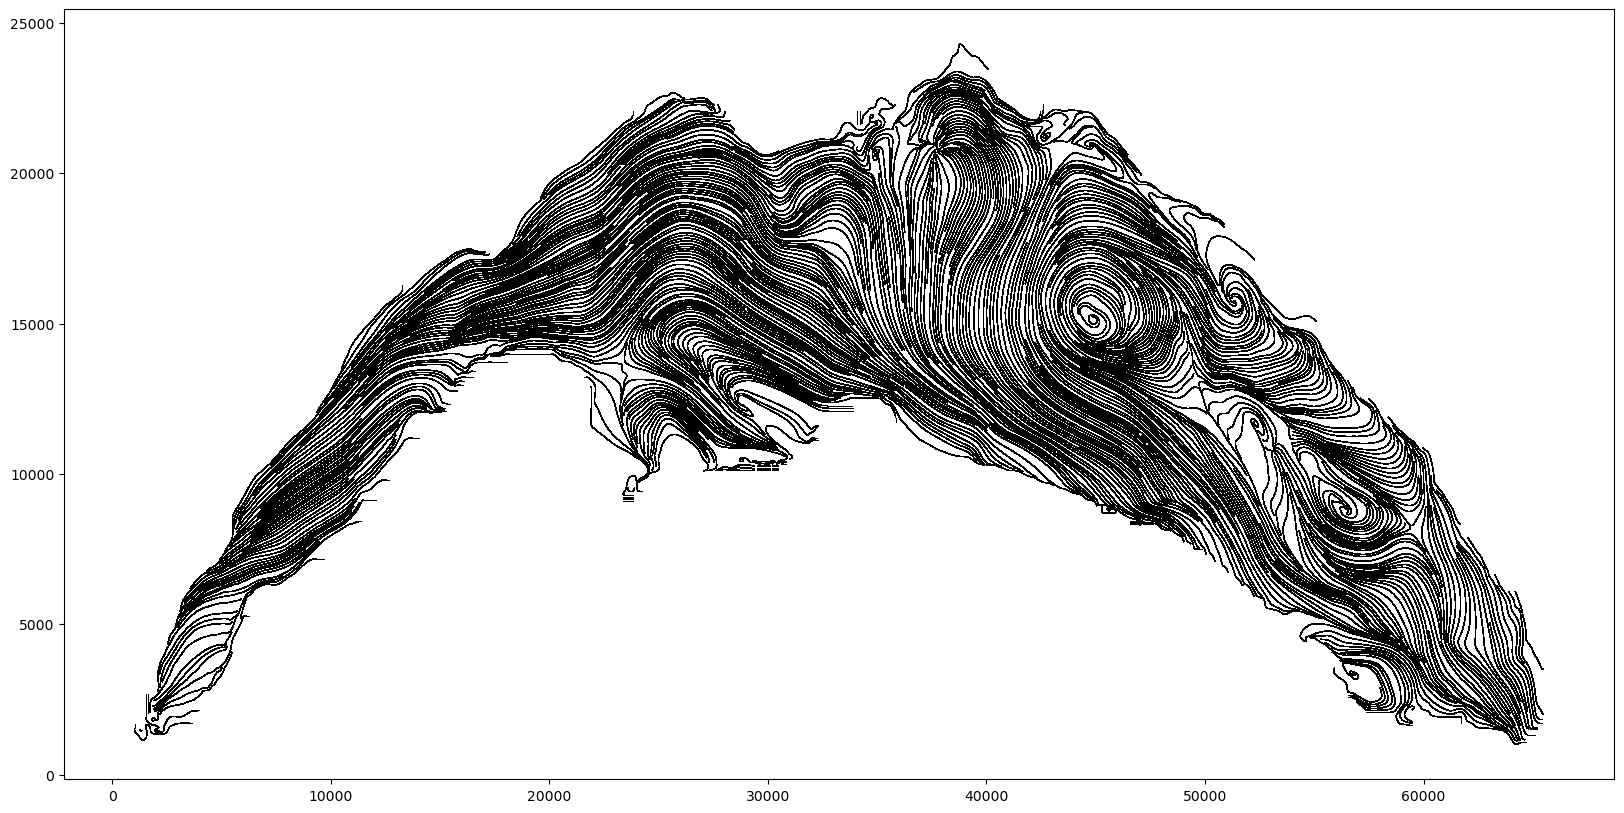

In [17]:
from matplotlib.collections import LineCollection
%matplotlib inline

# Make a LineCollection from the streamline coordinates
line_segments = LineCollection(streamline_coords, colors='black', linewidths=0.5)
line_segments.set_antialiaseds(False)
fig, ax = plt.subplots(figsize=(20,10))
ax.add_collection(line_segments)
ax.autoscale()